<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_10_Euler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio: Simulación de un Péndulo Simple con el Método de Euler y RungeKutta

## Objetivo
Simular el movimiento de un péndulo simple  con fricción utilizando el método de Euler y Runge Kutta para resolver las ecuaciones diferenciales que describen su movimiento.

## Descripción del Péndulo Simple
Un péndulo simple consiste en una masa puntual suspendida de un hilo inextensible y sin masa en el cual  la masa oscila bajo la influencia de la gravedad.

## Ecuaciones del Movimiento
Las ecuaciones de movimiento de un péndulo simple de longitud L, en presencia de  fricción, vienen dadas por :

1. Ecuación diferencial de la posición angular:

\begin{equation}
\frac{d^2\theta}{dt^2} + \frac{g}{L}\sin(\theta) + \gamma L \frac{d\theta}{dt}= 0
\end{equation}

donde $\theta$ es el ángulo de desplazamiento, $g=9.8$m/s la aceleración de la gravedad  y  \gamma la constante de amortigüamiento.

2. La ecuación diferencial se puede separar en dos ecuaciones de primer orden:

\begin{equation}
\frac{d\theta}{dt} = \omega
\end{equation}
   
\begin{equation}
\frac{d\omega}{dt} = -\frac{g}{L}\sin(\theta) - \gamma L \omega
\end{equation}


## Parámetros
- $g$: Aceleración debido a la gravedad (9.81 $m/s^2$)
- $L$: Longitud del hilo del péndulo (en metros)
- $\theta_0$: Ángulo inicial de desplazamiento (en radianes)
- $\omega_0$: Velocidad angular inicial (en radianes/segundo)
- $\Delta t$: Paso de tiempo para la simulación (en segundos)
- $t_{max}$: Tiempo máximo de simulación (en segundos)

## Instrucciones
1. **Inicialización**:
   - Establezca los valores iniciales: $\theta = \theta_0$ y $\omega = \omega_0$.
   - Defina el intervalo de tiempo $\Delta t$ y el tiempo total de simulación $t_{max}$.

2. **Aplicación del Método de Euler y Runge Kutta**:
   - Construya una función con funciones a integrar
   - Construya una función con el método euler y otra para el metodo de rungekutta.
   - Emplee la librería de integración odeint para validar la solución numérica.  
   - Emplee la solución teórica para validar todos los resultados anteriores.
     
3. **Resultados**:
   - Registre los valores de $\theta$ y $\omega$ para cada instante de tiempo.
   - Grafique $\theta$ y $\omega$ en función del tiempo para visualizar el movimiento del péndulo.
   - Encuentre una expresión para determinar la energía cinética, potencial y total del péndulo simple.

## Funciones a Implementar

### 1. `fun`: Función de las Ecuaciones del Péndulo Simple
Esta función calcula las derivadas de las variables de estado $\theta$ y $\omega\$ en un instante dado.


```python
def fun(theta, omega, g, L):
    """
    Calcula las derivadas del ángulo y la velocidad angular para un péndulo simple.

    Args:
        theta (float): Ángulo de desplazamiento (en radianes).
        omega (float): Velocidad angular (en radianes/segundo).
        g (float): Aceleración debida a la gravedad (en m/s²).
        L (float): Longitud del hilo del péndulo (en metros).

    Returns:
        Array: Derivadas de theta y omega.
    """
    dtheta_dt = ...
    domega_dt = ...
    return np.array([dtheta_dt, domega_dt])
```

## Preguntas
1. ¿Cómo afecta el paso de tiempo Δt a la precisión de la simulación?
2. ¿Qué sucede si el ángulo inicial $\theta_0$   no es pequeño? ¿Sigue siendo válida la aproximación $\sin \theta \approx \theta$
3. ¿Cómo varía el movimiento del péndulo con respecto a los parámetros $L$ y $\theta_0$
4. ¿Qué observas en la energía del sistema a lo largo del tiempo? ¿Se conserva?
5. ¿Qué diferencias encuentras si comparas los resultados obtenidos con el método de Euler con los obtenidos utilizando métodos más precisos él de Runge-Kutta?
6. Realizar una animación para del movimiento del pendulo simple, con las soluciones dadas en el metodo de RungeKutta.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [35]:
# Parametros
g=9.8 #m/s**2
L=0.5 #m
theta_0=np.pi/4 #rad
omega_0=0 #rad/s
m=1 #kg
y=0.3
dt=0.001 #s
ti=0 #s
tmax=20#s
N = int((tmax-ti)/dt)
t = np.linspace(ti, tmax, N)

## Método de Euler
\begin{equation}
\frac{d\theta}{dt} = \omega
\end{equation}
   
\begin{equation}
\frac{d\omega}{dt} = -\frac{g}{L}\sin(\theta) - \gamma L \omega
\end{equation}


In [36]:
def funcion(theta, omega, g, y,m,L,t):
  dtheta_dt = omega
  domega_dt = (-g / L)*np.sin(theta) - (L*y* omega)
  vector = np.array([dtheta_dt, domega_dt])
  return vector

#

omegas = np.zeros((N))
thetas = np.zeros((N))
params=(g, y,m,L,t)
thetas[0] = theta_0
omegas[0] = omega_0
v_0=np.array([theta_0, omega_0])

# Euler

def euler(funcion,omegas,thetas, dt):
  for i in range(0,N-1):
    thetas[0] = theta_0
    omegas[0] = omega_0
    thetas[i+1] = thetas[i] + dt * funcion(thetas[i],omegas[i],g, y,m,L,t)[0]
    omegas[i+1] = omegas[i] + dt * funcion(thetas[i],omegas[i],g, y,m,L,t)[1]
  return thetas*180/np.pi,omegas

theta_, omega_ = euler(funcion,omegas,thetas, dt)


In [37]:
omega_

array([ 0.        , -0.01385929, -0.02771651, ...,  0.54231587,
        0.53897801,  0.53563017])

Runge-Kutta

In [38]:
def omega_t(t,omega,theta):
  f = (-g / L)*np.sin(theta) - (L*y* omega)
  return f

def RK4(f, dt):
  omegas_r= np.zeros(N)
  thetas_r= np.zeros(N)
  thetas_r[0] = theta_0
  for i ,ti in enumerate(t[0:-1]):
      k1 = f(ti, omegas_r[i],thetas_r[i])
      k2 = f(ti+ 0.5* dt, omegas_r[i] + 0.5* k1* dt,thetas_r[i])
      k3 = f(ti+ 0.5* dt, omegas_r[i] + 0.5* k2* dt,thetas_r[i] )
      k4 = f(ti + dt, omegas_r[i]  + k3* dt,thetas_r[i])
      omegas_r[i+1] = omegas_r[i] + (1/6)*dt* (k1 + 2*k2 + 2*k3 + k4)
      thetas_r[i+1] = thetas_r[i] + omegas_r[i+1] * dt
  return (thetas_r* 180/np.pi),omegas_r

theta_1, omega_1=RK4(omega_t, dt)

Odeint

In [39]:
def pendulo(v, t, g,y,m,L):
  theta, omega = v
  dtheta_dt = omega
  domega_dt = (-g / L)*np.sin(theta) - (L*y* omega)
  return np.array([dtheta_dt, domega_dt])

v=np.array([theta_0, omega_0])
theta_od = odeint(pendulo, v, t, args=(g,y,m,L))

3. **Resultados**:
   - Registre los valores de $\theta$ y $\omega$ para cada instante de tiempo.
   - Grafique $\theta$ y $\omega$ en función del tiempo para visualizar el movimiento del péndulo.
   - Encuentre una expresión para determinar la energía cinética, potencial y total del péndulo simple.


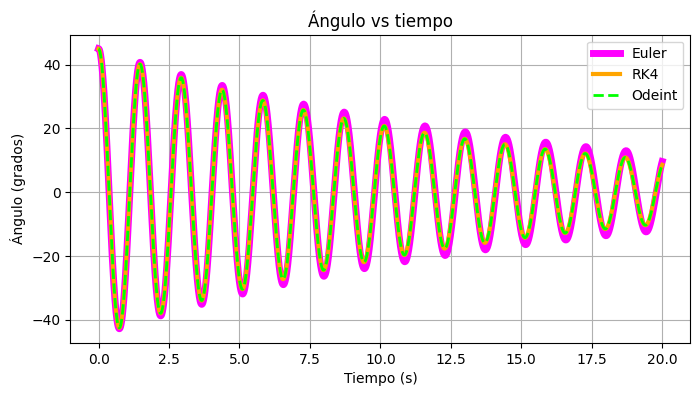

In [40]:
plt.figure(figsize=(8,4))
plt.plot(t, theta_, label='Euler',linewidth=5 ,color='magenta')
plt.plot(t, theta_1, label='RK4',linewidth=3,  color='orange')
plt.plot(t, theta_od[:,0]*180/np.pi,linewidth=2, label='Odeint', color='lime',linestyle='dashed')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (grados)')
plt.title('Ángulo vs tiempo')
plt.grid()
plt.legend()
plt.show()

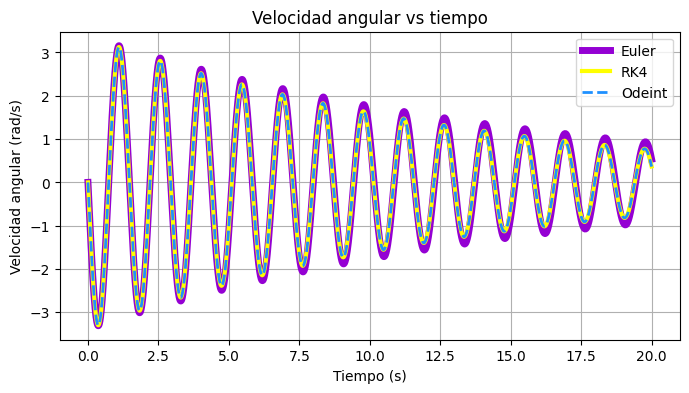

In [41]:
plt.figure(figsize=(8,4))
plt.plot(t, omega_, label='Euler',linewidth=5 ,color='darkviolet')
plt.plot(t, omega_1, label='RK4',linewidth=3,  color='yellow')
plt.plot(t, theta_od[:,1],linewidth=2, label='Odeint', color='dodgerblue',linestyle='dashed')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad angular (rad/s)')
plt.title('Velocidad angular vs tiempo')
plt.legend()
plt.grid()

## Energia cinetica y potencial

Energía Mecánica Total

\begin{equation}
E = K + U
\end{equation}

Energía Cinética

\begin{equation}
K=\frac{1}{2}m(Lω)^2
\end{equation}

Energía Potencial

\begin{equation}
U=mgL(1−cos(θ))
\end{equation}


RK4

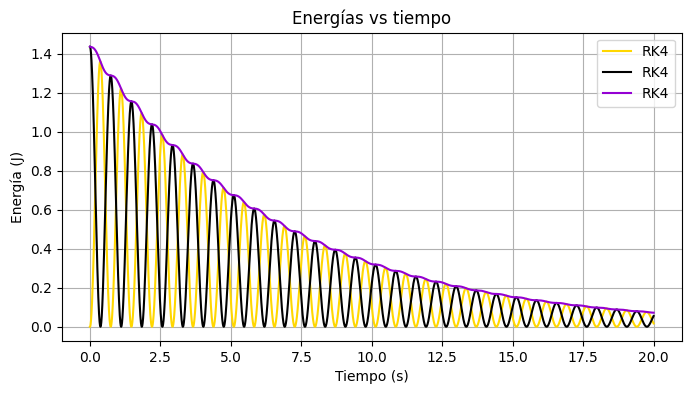

In [42]:
U=m*g*L*(1-np.cos(theta_1*np.pi/180))
K=0.5*m*(L*omega_1)**2
E=K+U

plt.figure(figsize=(8,4))
plt.plot(t, K, label='RK4',  color='gold')
plt.plot(t, U, label='RK4',  color='black')
plt.plot(t, E, label='RK4',  color='darkviolet')
plt.xlabel('Tiempo (s)')
plt.ylabel('Energía (J)')
plt.title('Energías vs tiempo')
plt.grid()
plt.legend()
plt.show()


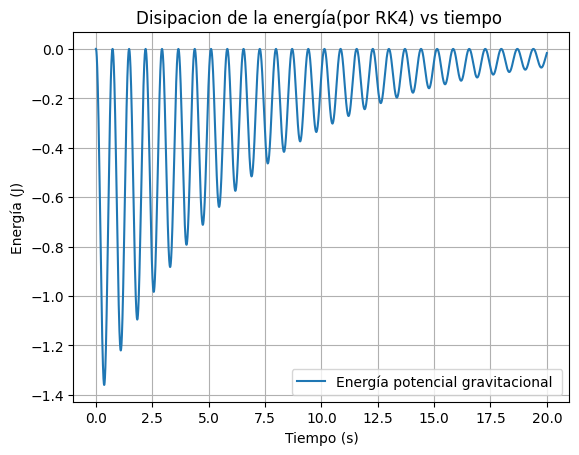

In [43]:
E_T=m*g*L*(1-np.cos(theta_1*np.pi/180))
plt.plot(t,E_T-E, label ="Energía potencial gravitacional ")
plt.xlabel("Tiempo (s)")
plt.ylabel("Energía (J)")
plt.title("Disipacion de la energía(por RK4) vs tiempo ")
plt.grid()
plt.legend()
plt.show();

## Preguntas
1. ¿Cómo afecta el paso de tiempo Δt a la precisión de la simulación?



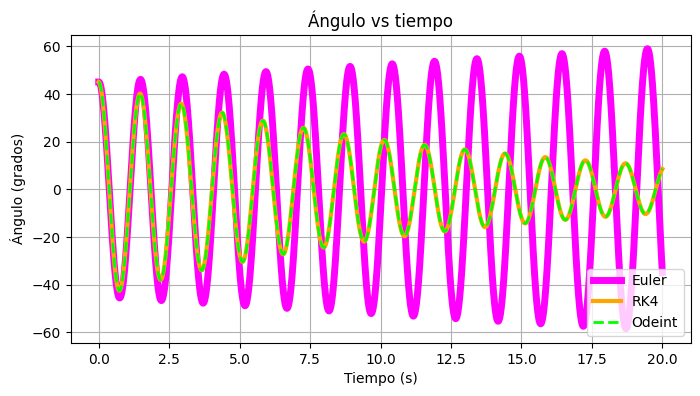

In [44]:
dt=0.01 #s
ti=0 #s
tmax=20#s
N = int((tmax-ti)/dt)
t = np.linspace(ti, tmax, N)
omegas = np.zeros((N))
thetas = np.zeros((N))
params=(g, y,m,L,t)
thetas[0] = theta_0
omegas[0] = omega_0
v_0=np.array([theta_0, omega_0])

v=np.array([theta_0, omega_0])
theta_od = odeint(pendulo, v, t, args=(g,y,m,L))
theta_1, omega_1=RK4(omega_t, dt)
theta_, omega_ = euler(funcion,omegas,thetas, dt)

plt.figure(figsize=(8,4))
plt.plot(t, theta_, label='Euler',linewidth=5 ,color='magenta')
plt.plot(t, theta_1, label='RK4',linewidth=3,  color='orange')
plt.plot(t, theta_od[:,0]*180/np.pi,linewidth=2, label='Odeint', color='lime',linestyle='dashed')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (grados)')
plt.title('Ángulo vs tiempo')
plt.grid()
plt.legend()
plt.show()

Para el gráfico anterior, dt se definió como 0.01, mientras que en las gráficas previas el dt fue de 0.001. Como se puede observar, la precisión del método de Euler disminuyó con el cambio en el tamaño del paso (dt), mientras que RK4 se mantiene alineado con la solución de odeint. Por lo tanto, el error en el método de Euler es mayor, lo que lo hace menos preciso.

Esto lo podemos confirmar generando distintas gráficas al variar el dt y observando cómo mejora la precisión del método de Euler.

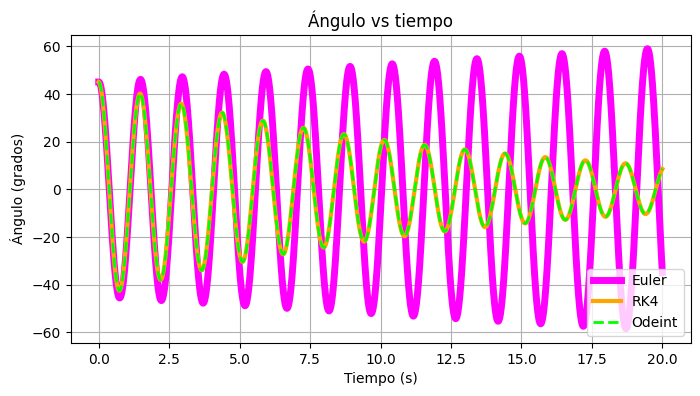

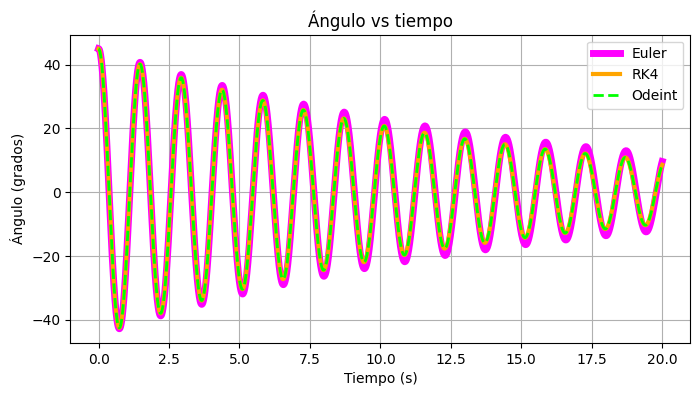

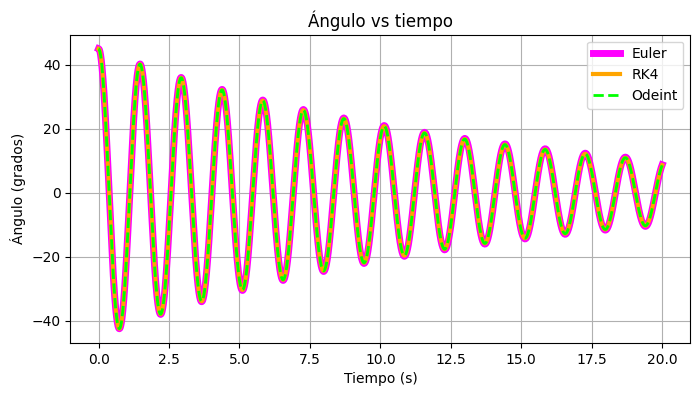

In [45]:
dt_s=[0.01,0.001,0.0001]
for dt in dt_s:
    ti=0 #s
    tmax=20#s
    N = int((tmax-ti)/dt)
    t = np.linspace(ti, tmax, N)
    omegas = np.zeros((N))
    thetas = np.zeros((N))
    params=(g, y,m,L,t)
    thetas[0] = theta_0
    omegas[0] = omega_0
    v_0=np.array([theta_0, omega_0])

    v=np.array([theta_0, omega_0])
    theta_od = odeint(pendulo, v, t, args=(g,y,m,L))
    theta_1, omega_1=RK4(omega_t, dt)
    theta_, omega_ = euler(funcion,omegas,thetas, dt)

    plt.figure(figsize=(8,4))
    plt.plot(t, theta_, label='Euler',linewidth=5 ,color='magenta')
    plt.plot(t, theta_1, label='RK4',linewidth=3,  color='orange')
    plt.plot(t, theta_od[:,0]*180/np.pi,linewidth=2, label='Odeint', color='lime',linestyle='dashed')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Ángulo (grados)')
    plt.title('Ángulo vs tiempo')
    plt.grid()
    plt.legend()
    plt.show()

2. ¿Qué sucede si el ángulo inicial $\theta_0$   no es pequeño? ¿Sigue siendo válida la aproximación $\sin \theta \approx \theta$





3. ¿Cómo varía el movimiento del péndulo con respecto a los parámetros $L$ y $\theta_0$





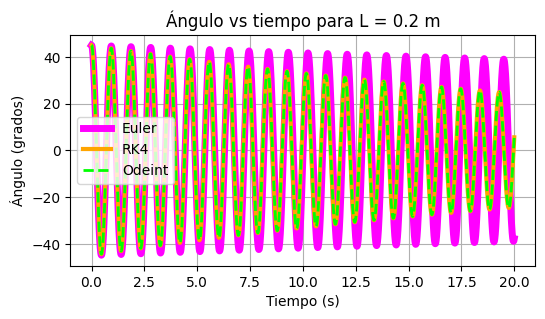

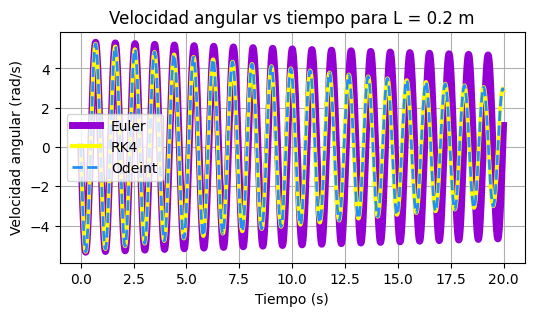

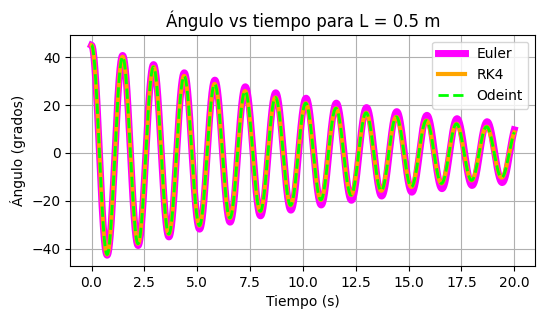

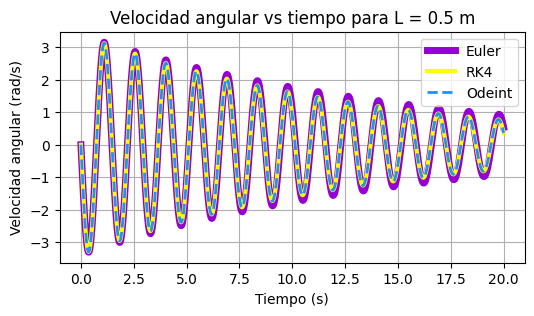

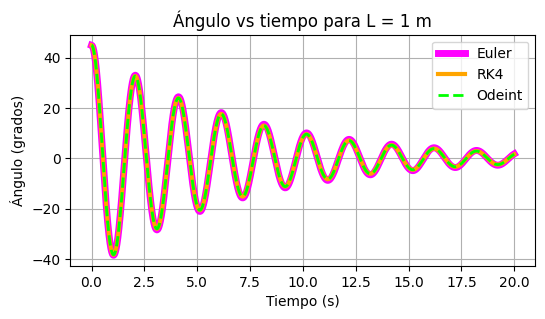

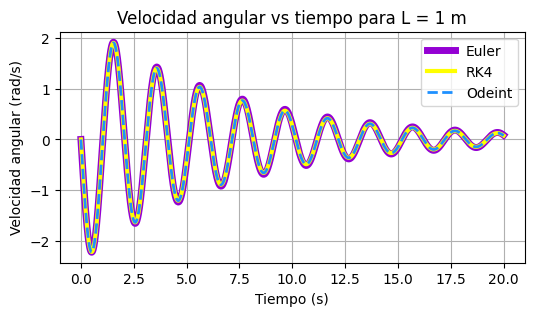

In [46]:
Ls = [0.2, 0.5, 1]
g=9.8 #m/s**2
theta_0=np.pi/4 #rad
omega_0=0 #rad/s
m=1 #kg
y=0.3
dt=0.001 #s
ti=0 #s
tmax=20#s
N = int((tmax-ti)/dt)
t = np.linspace(ti, tmax, N)

for L in Ls:
    omegas = np.zeros((N))
    thetas = np.zeros((N))
    thetas[0] = theta_0
    omegas[0] = omega_0
    v = np.array([theta_0, omega_0])


    theta_, omega_ = euler(funcion, omegas, thetas, dt)
    theta_1, omega_1 = RK4(omega_t, dt)
    theta_od = odeint(pendulo, v, t, args=(g, y, m, L))


    plt.figure(figsize=(6,3))
    plt.plot(t, theta_, label='Euler',linewidth=5 ,color='magenta')
    plt.plot(t, theta_1, label='RK4',linewidth=3,  color='orange')
    plt.plot(t, theta_od[:,0]*180/np.pi,linewidth=2, label='Odeint', color='lime',linestyle='dashed')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Ángulo (grados)')
    plt.title(f'Ángulo vs tiempo para L = {L} m')
    plt.grid()
    plt.legend()
    plt.show()

    plt.figure(figsize=(6,3))
    plt.plot(t, omega_, label='Euler',linewidth=5 ,color='darkviolet')
    plt.plot(t, omega_1, label='RK4',linewidth=3,  color='yellow')
    plt.plot(t, theta_od[:,1],linewidth=2, label='Odeint', color='dodgerblue',linestyle='dashed')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Velocidad angular (rad/s)')
    plt.title(f'Velocidad angular vs tiempo para L = {L} m')
    plt.legend()
    plt.grid()
    plt.show()

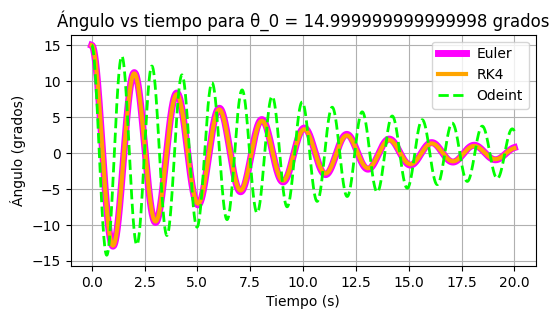

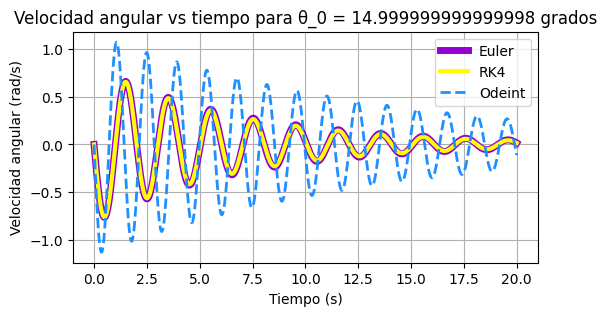

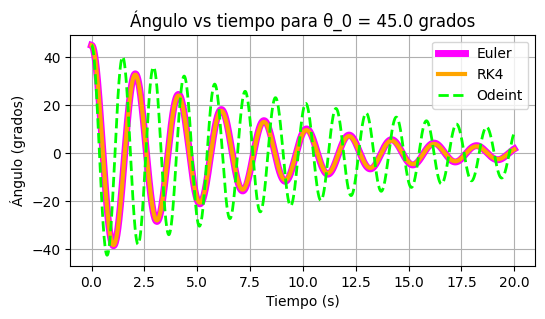

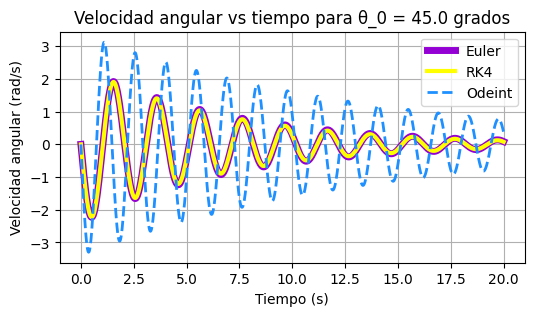

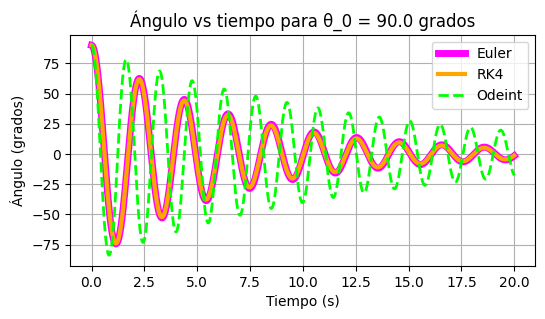

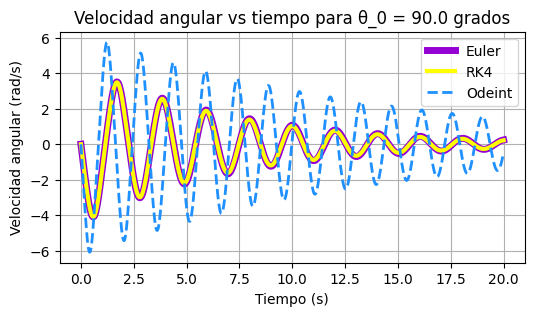

In [47]:
# Lista de ángulos iniciales
theta_0s = [np.pi/12, np.pi/4, np.pi/2]
L_constante = 0.5

for theta_0 in theta_0s:
    v_0 = np.array([theta_0, omega_0])
    theta_, omega_ = euler(funcion, omegas, thetas, dt)
    theta_1, omega_1 = RK4(omega_t, dt)
    theta_od = odeint(pendulo, v_0, t, args=(g, y, m, L_constante))


    plt.figure(figsize=(6,3))
    plt.plot(t, theta_, label='Euler',linewidth=5 ,color='magenta')
    plt.plot(t, theta_1, label='RK4',linewidth=3,  color='orange')
    plt.plot(t, theta_od[:,0]*180/np.pi,linewidth=2, label='Odeint', color='lime',linestyle='dashed')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Ángulo (grados)')
    plt.title(f'Ángulo vs tiempo para θ_0 = {theta_0 * 180/np.pi} grados')
    plt.grid()
    plt.legend()
    plt.show()

    plt.figure(figsize=(6,3))
    plt.plot(t, omega_, label='Euler',linewidth=5 ,color='darkviolet')
    plt.plot(t, omega_1, label='RK4',linewidth=3,  color='yellow')
    plt.plot(t, theta_od[:,1],linewidth=2, label='Odeint', color='dodgerblue',linestyle='dashed')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Velocidad angular (rad/s)')
    plt.title(f'Velocidad angular vs tiempo para θ_0 = {theta_0 * 180/np.pi} grados')
    plt.legend()
    plt.grid()
    plt.show()


4. ¿Qué observas en la energía del sistema a lo largo del tiempo? ¿Se conserva?


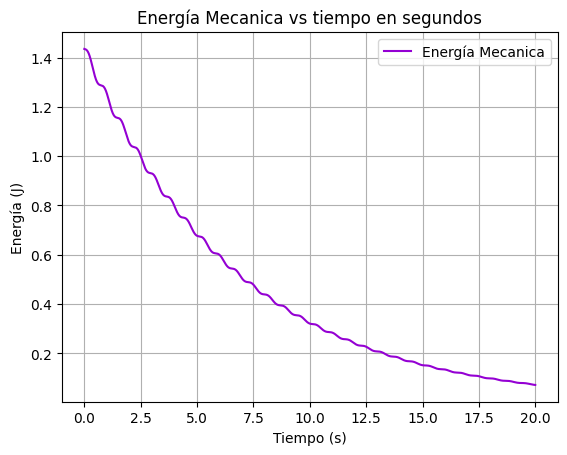

In [48]:
plt.plot(t,E, color='darkviolet', label ="Energía Mecanica")
plt.xlabel("Tiempo (s)")
plt.ylabel("Energía (J)")
plt.title("Energía Mecanica vs tiempo en segundos")
plt.grid()
plt.legend()
plt.show();

En un péndulo amortiguado, la energía no se conserva debido a las fuerzas disipativas(fuerza de fricción en este caso), y la energía del sistema disminuye a lo largo del tiempo hasta que el péndulo eventualmente se detiene.

5. ¿Qué diferencias encuentras si comparas los resultados obtenidos con el método de Euler con los obtenidos utilizando métodos más precisos él de Runge-Kutta?


Como se observó, al variar dt, es decir, el paso de tiempo con el método de Euler, la precisión aumentaba a medida que dt se hacía más pequeño. Sin embargo, con el método de Runge-Kutta de cuarto orden (RK4), esto no era tan relevante, ya que incluso con un dt relativamente grande, se obtenía una función que se ajustaba a la solución de odeint. Por lo tanto, podemos decir que el método RK4 es superior en términos de precisión, estabilidad y control de errores acumulados.
